# 이미지 처리
## 이미지 정보

<class 'PIL.JpegImagePlugin.JpegImageFile'>


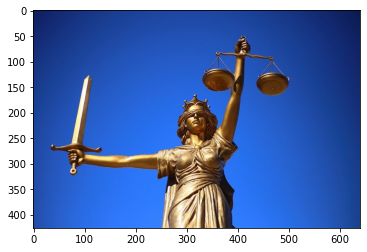

x좌표: 100, y좌표: 200의 픽셀값: [120  83  54]
이미지 크기: (640, 426)
이미지 형태: (426, 640, 3)


In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 객체 생성
img = Image.open('justice.jpg')
print(type(img)) # <class 'PIL.JpegImagePlugin.JpegImageFile'>

# 이미지 출력
plt.imshow(img) # 인자: 이미지 객체, 넘파이 배열
plt.show()

# 픽셀 정보 (넘파이 배열)
pixel = np.array(img)
print('x좌표: {}, y좌표: {}의 픽셀값: {}'.format(100,200,pixel[200,100])) # 이미지 좌표계
print('이미지 크기: {}'.format(img.size)) # 크기: (가로, 세로)
print('이미지 형태: {}'.format(pixel.shape)) # 형태: (세로, 가로, 3차원)

## Pillow의 이미지 객체를 통한 이미지 처리

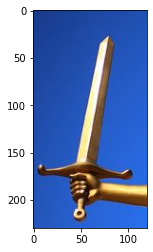

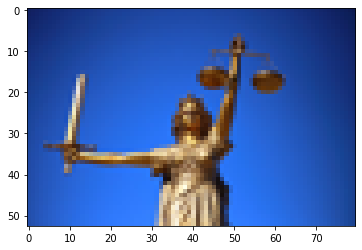

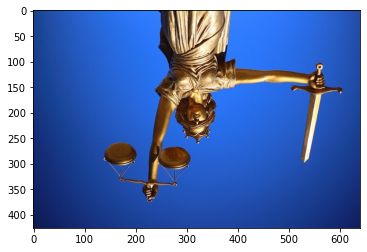

In [10]:
# 이미지 객체를 파일로 저장
img.save('my_img.jpg')

# 이미지 특정부분 자르기
crop_img = img.crop((30,100,150,330)) # (좌상, 우하)
plt.imshow(crop_img)
plt.show()

# 이미지 사이즈 조절 (인자: 튜플)
resize_img = img.resize((int(img.size[0]/8), int(img.size[1]/8))) # (가로, 세로)
plt.imshow(resize_img)
plt.show()

# 이미지 회전 (이미지 증식에 사용)
rotate_img = img.rotate(180) # radian
plt.imshow(rotate_img)
plt.show()

## 컬러 이미지를 흑백 이미지로 변환

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### 3차원

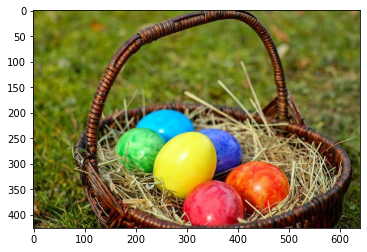

color_pixel의 형태: (426, 640, 3)


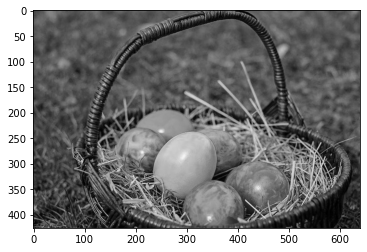

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 객체 생성
color_img = Image.open('fruits.jpg')
plt.imshow(color_img)
plt.show()

# 넘파이 배열로 픽셀값 생성
color_pixel = np.array(color_img) # 3차원
print('color_pixel의 형태: {}'.format(color_pixel.shape)) # (426, 640, 3)

# 흑백 이미지로 처리
gray_pixel = color_pixel.copy() # 새로운 넘파이 배열 생성(3차원)

for y in range(gray_pixel.shape[0]): # 426
    for x in range(gray_pixel.shape[1]): # 640
        # broadcasting
        gray_pixel[y,x] = int(np.mean(gray_pixel[y,x])) # 해당 픽셀 안의 컬러 벡터 (RGB 넘파이 배열)

plt.imshow(gray_pixel)
plt.show()

### 2차원

(426, 640)


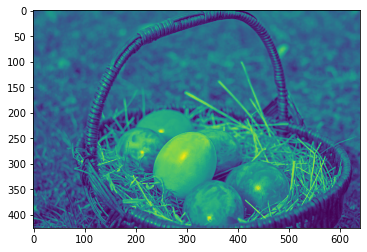

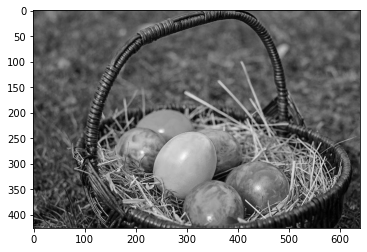

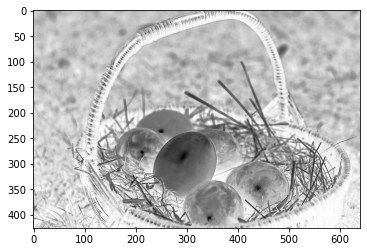

In [19]:
gray_2d_pixel = gray_pixel[:,:,0] # 3차원 흑백 이미지에 대한 슬라이싱 (세로, 가로, 평균컬러)
print(gray_2d_pixel.shape) # 2차원: (426, 640) 

# 3차원 넘파이 배열에 대한 이미지 출력
plt.imshow(gray_2d_pixel) 
plt.show()

# 2차원 넘파이 배열에 대한 이미지 출력
plt.imshow(gray_2d_pixel, cmap='gray') # Greys = gray_r 
plt.show()

plt.imshow(gray_2d_pixel, cmap='Greys') # gray_r 
plt.show()

# 이미지(흑백 처리된 2차원 ndarray)를 파일로 저장
gray_2d_img = Image.fromarray(gray_2d_pixel) # ndarray로 부터 이미지 객체를 생성
gray_2d_img.save('my_gray_img.jpg')